---
# Data Science and Artificial Intelliegence Practicum
## 3.3-modul. Data Wrangling
---

## 3.3.2 - Combining Data

In [ ]:
import numpy as np
import pandas as pd

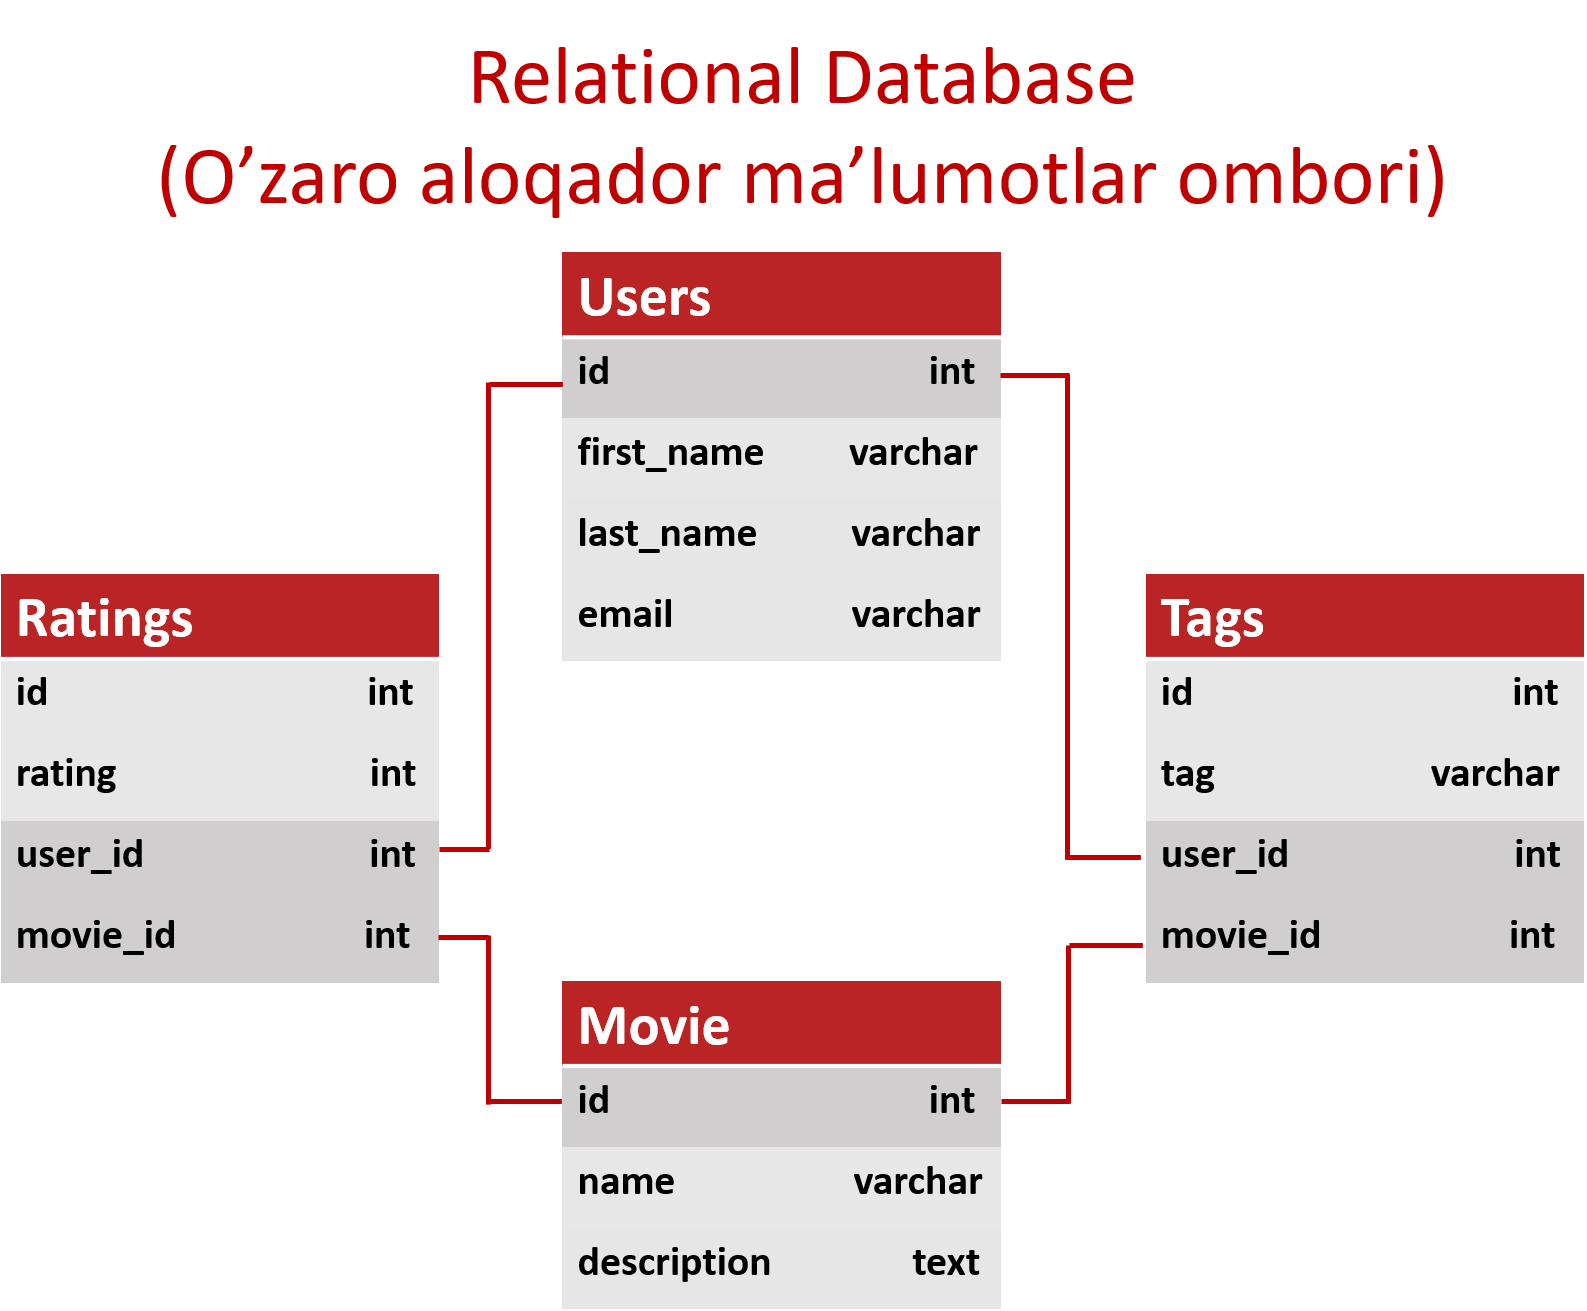

In [ ]:
! git clone https://github.com/MansurCompAI/Practicum_Datasets.git

Cloning into 'Practicum_Datasets'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 17), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [ ]:
movies = pd.read_csv("/content/Practicum_Datasets/IMDb/IMDb_movies.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   imdb_title_id       85855 non-null  object
 1   title               85855 non-null  object
 2   original_title      85855 non-null  object
 3   year                85855 non-null  object
 4   date_published      85855 non-null  object
 5   genre               85855 non-null  object
 6   duration            85855 non-null  int64 
 7   country             85791 non-null  object
 8   language            85022 non-null  object
 9   director            85768 non-null  object
 10  writer              84283 non-null  object
 11  production_company  81400 non-null  object
 12  actors              85786 non-null  object
 13  description         83740 non-null  object
 14  budget              23710 non-null  object
dtypes: int64(1), object(14)
memory usage: 9.8+ MB


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ratings = pd.read_csv("/content/Practicum_Datasets/IMDb/IMDb_ratings.csv")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   weighted_average_vote  85855 non-null  float64
 2   total_votes            85855 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ MB


### **Merging**

In [ ]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,NaN
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,$ 2250
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,NaN
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,$ 45000
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,NaN


In [ ]:
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes
0,tt0000009,5.9,154
1,tt0000574,6.1,589
2,tt0001892,5.8,188
3,tt0002101,5.2,446
4,tt0002130,7.0,2237


#### **`pandas.merge`**
*Merge DataFrame or named Series objects with a database-style join.*
A named Series object is treated as a DataFrame with a single named column.

**Parameters:**

- **left : *DataFrame***

- **right : *DataFrame or named Series*** -> Object to merge with.

- **on : *label or list*** -> Column or index level names to join on. These must be found in both DataFrames. If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.

In [ ]:
movies_ratings = pd.merge(movies, ratings)
movies_ratings.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'budget',
       'weighted_average_vote', 'total_votes'],
      dtype='object')

In [ ]:
extracted = movies_ratings[['title', 'year', 'weighted_average_vote']]
extracted

,title,year,weighted_average_vote
0,Miss Jerry,1894,5.9
1,The Story of the Kelly Gang,1906,6.1
2,Den sorte drøm,1911,5.8
3,Cleopatra,1912,5.2
4,L'Inferno,1911,7.0
...,...,...,...
85850,Le lion,2020,5.3
85851,De Beentjes van Sint-Hildegard,2020,7.7
85852,Padmavyuhathile Abhimanyu,2019,7.9
85853,Sokagin Çocuklari,2019,6.4


##### **how** parameter

**how : *{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’*** -> Type of merge to be performed.

  - *left* : use only keys from left frame, similar to a SQL left outer join; preserve key order.

  - *right* : use only keys from right frame, similar to a SQL right outer join; preserve key order.

  - *outer* : use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.

  - *inner* : use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

  - *cross* : creates the cartesian product from both frames, preserves the order of the left keys.

In [ ]:
A = pd.DataFrame({'Transport': ['train', 'automobile', 'ship'], 
                  'Speed':['70', '180', '45']}
                 )

A

,Transport,Speed
0,train,70
1,automobile,180
2,ship,45


In [ ]:
B = pd.DataFrame({'Transport':['train', 'automobile', 'tram'],
                  'Price':[98000, 10000, 65000]})
B

,Transport,Price
0,train,98000
1,automobile,10000
2,tram,65000


###### **Inner Join**
![inner-join](https://datasciencemadesimple.com/wp-content/uploads/2020/05/Join-in-Pandas-Merge-data-frames-inner-outer-right-left-join-in-pandas-python-3a.png)

In [ ]:
pd.merge(A, B, how='inner')  # default inner

,Transport,Speed,Price
0,train,70,98000
1,automobile,180,10000


###### **Outer Join**
![outer-join](https://datasciencemadesimple.com/wp-content/uploads/2020/05/Join-in-Pandas-Merge-data-frames-inner-outer-right-left-join-in-pandas-python-4a.png)

In [ ]:
pd.merge(A, B, how='outer')

,Transport,Speed,Price
0,train,70,98000.0
1,automobile,180,10000.0
2,ship,45,NaN
3,tram,NaN,65000.0


###### **Right Join**
![right-join](https://datasciencemadesimple.com/wp-content/uploads/2020/05/Join-in-Pandas-Merge-data-frames-inner-outer-right-left-join-in-pandas-python-6a.png)

In [ ]:
pd.merge(A, B, how='right')

,Transport,Speed,Price
0,train,70,98000
1,automobile,180,10000
2,tram,NaN,65000


###### **Left Join**
![left-join](https://datasciencemadesimple.com/wp-content/uploads/2020/05/Join-in-Pandas-Merge-data-frames-inner-outer-right-left-join-in-pandas-python-5a.png)

In [ ]:
pd.merge(A, B, how='left')

,Transport,Speed,Price
0,train,70,98000.0
1,automobile,180,10000.0
2,ship,45,NaN


###### **Cross Join**
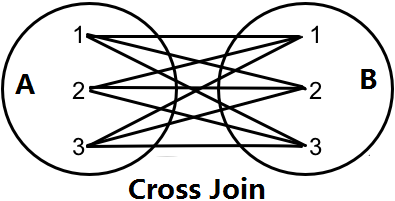

In [ ]:
pd.merge(A, B, how='cross')

,Transport_x,Speed,Transport_y,Price
0,train,70,train,98000
1,train,70,automobile,10000
2,train,70,tram,65000
3,automobile,180,train,98000
4,automobile,180,automobile,10000
5,automobile,180,tram,65000
6,ship,45,train,98000
7,ship,45,automobile,10000
8,ship,45,tram,65000


##### **Merge on different colunn names**

- **left_on : *label or list, or array-like*** -> Column or index level names to join on in the left DataFrame. Can also be an array or list of arrays of the length of the left DataFrame. These arrays are treated as if they are columns.

- **right_on : *label or list, or array-like*** -> Column or index level names to join on in the right DataFrame. Can also be an array or list of arrays of the length of the right DataFrame. These arrays are treated as if they are columns.

In [ ]:
A = pd.DataFrame({'Transport_type': ['train', 'automobile', 'ship'], 
                  'Speed':['70', '180', '45']}
                 )
A

,Transport_type,Speed
0,train,70
1,automobile,180
2,ship,45


In [ ]:
B

,Transport,Price
0,train,98000
1,automobile,10000
2,tram,65000


It might happen that the column on which you want to merge the DataFrames have different names. For such merges, you will have to specify the `left_on` as the left DataFrame name and `right_on` as the right DataFrame name.

In [ ]:
pd.merge(A, B, left_on='Transport_type', right_on='Transport')

,Transport_type,Speed,Transport,Price
0,train,70,train,98000
1,automobile,180,automobile,10000


The result will contain both ***Transport_type*** and ***Transport*** columns.

---

##### **Merge by Index**

- **left_index : *bool, default False*** -> Use the index from the left DataFrame as the join key(s). If it is a MultiIndex, the number of keys in the other DataFrame (either the index or a number of columns) must match the number of levels.

- **right_index : *bool, default False*** -> Use the index from the right DataFrame as the join key. Same caveats as left_index.

In [ ]:
A.set_index('Transport_type', inplace=True)
A

,Speed
Transport_type,
train,70
automobile,180
ship,45


In [ ]:
B

,Transport,Price
0,train,98000
1,automobile,10000
2,tram,65000


In [ ]:
pd.merge(A, B, left_index=True, right_on='Transport')

,Speed,Transport,Price
0,70,train,98000
1,180,automobile,10000


In [ ]:
B.set_index('Transport', inplace=True)
B

,Price
Transport,
train,98000
automobile,10000
tram,65000


In [ ]:
pd.merge(A, B, left_index=True, right_index=True)

,Speed,Price
train,70,98000
automobile,180,10000


### **Joining**

In [ ]:
movies_info = movies[['title', 'year', 'genre', 'country']]
movies_info.head()

,title,year,genre,country
0,Miss Jerry,1894,Romance,USA
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia
2,Den sorte drøm,1911,Drama,"Germany, Denmark"
3,Cleopatra,1912,"Drama, History",USA
4,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy


In [ ]:
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes
0,tt0000009,5.9,154
1,tt0000574,6.1,589
2,tt0001892,5.8,188
3,tt0002101,5.2,446
4,tt0002130,7.0,2237


#### **`DataFrame.join`**
Join columns of another DataFrame.

**Parameters:**

- **other : *DataFrame, Series, or list of DataFrame*** -> Index should be similar to one of the columns in this one. If a Series is passed, its name attribute must be set, and that will be used as the column name in the resulting joined DataFrame.

- **on : *str, list of str, or array-like, optional*** -> Column or index level name(s) in the caller to join on the index in other, otherwise joins index-on-index. If multiple values given, the other DataFrame must have a MultiIndex. Can pass an array as the join key if it is not already contained in the calling DataFrame. Like an Excel VLOOKUP operation.

- **how : *{‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘left’*** -> How to handle the operation of the two objects.

  - *left*: use calling frame’s index (or column if on is specified)

  - *right*: use other’s index.

  - *outer*: form union of calling frame’s index (or column if on is specified) with other’s index, and sort it. lexicographically.

  - *inner*: form intersection of calling frame’s index (or column if on is specified) with other’s index, preserving the order of the calling’s one.

  - *cross*: creates the cartesian product from both frames, preserves the order of the left keys.

- **lsuffix : *str, default ‘’*** -> Suffix to use from left frame’s overlapping columns.
- **rsuffix : *str, default ‘’*** -> Suffix to use from right frame’s overlapping columns.
- **sort : *bool, default False*** -> Order result DataFrame lexicographically by the join key. If False, the order of the join key depends on the join type (how keyword).


In [ ]:
movies_info.join(ratings).head()

,title,year,genre,country,imdb_title_id,weighted_average_vote,total_votes
0,Miss Jerry,1894,Romance,USA,tt0000009,5.9,154
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,tt0000574,6.1,589
2,Den sorte drøm,1911,Drama,"Germany, Denmark",tt0001892,5.8,188
3,Cleopatra,1912,"Drama, History",USA,tt0002101,5.2,446
4,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,tt0002130,7.0,2237


In [ ]:
movies_info1 = movies[['imdb_title_id', 'title', 'year', 'country']]
movies_info1.head(3)

,imdb_title_id,title,year,country
0,tt0000009,Miss Jerry,1894,USA
1,tt0000574,The Story of the Kelly Gang,1906,Australia
2,tt0001892,Den sorte drøm,1911,"Germany, Denmark"


In [ ]:
ratings.head(3)

,imdb_title_id,weighted_average_vote,total_votes
0,tt0000009,5.9,154
1,tt0000574,6.1,589
2,tt0001892,5.8,188


In [ ]:
movies_info1.join(ratings, rsuffix='_right').head()

,imdb_title_id,title,year,country,imdb_title_id_right,weighted_average_vote,total_votes
0,tt0000009,Miss Jerry,1894,USA,tt0000009,5.9,154
1,tt0000574,The Story of the Kelly Gang,1906,Australia,tt0000574,6.1,589
2,tt0001892,Den sorte drøm,1911,"Germany, Denmark",tt0001892,5.8,188
3,tt0002101,Cleopatra,1912,USA,tt0002101,5.2,446
4,tt0002130,L'Inferno,1911,Italy,tt0002130,7.0,2237


### **Concatenating**

In [ ]:
bank = pd.read_csv("/content/Practicum_Datasets/bank.csv", sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [67]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [104]:
# dividing bank dataset into bank1 and bank2
bank1, bank2 = bank[:2521], bank[2521:]
bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2521,46,unemployed,married,secondary,no,3533,yes,no,cellular,12,aug,235,2,-1,0,unknown,no
2522,59,blue-collar,divorced,secondary,no,3573,no,no,cellular,15,may,44,1,-1,0,unknown,no
2523,44,management,divorced,tertiary,no,476,yes,yes,unknown,26,may,127,2,-1,0,unknown,no
2524,35,blue-collar,married,secondary,no,1257,yes,no,cellular,20,apr,93,3,329,7,failure,no
2525,55,blue-collar,married,unknown,no,23,no,no,cellular,30,jan,143,1,2,3,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


#### **`pandas.concat`**
Concatenate pandas objects along a particular axis with optional set logic along the other axes.

In [101]:
pd.concat([bank1, bank2])  # connect 2 datasets

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [105]:
# dividing bank dataset into bank1, bank2 and bank3
bank1, bank2, bank3 = bank[:1000], bank[1000:2000], bank[2000:]
bank3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2000,28,blue-collar,married,primary,no,60,yes,no,cellular,6,may,161,1,337,1,failure,no
2001,45,blue-collar,married,primary,no,137,yes,yes,unknown,16,may,187,19,-1,0,unknown,no
2002,32,admin.,single,tertiary,no,1583,yes,no,cellular,19,nov,100,1,182,1,failure,no
2003,46,admin.,married,secondary,no,-121,yes,yes,cellular,8,jul,214,4,-1,0,unknown,no
2004,28,blue-collar,single,secondary,no,1065,yes,yes,cellular,17,apr,406,1,317,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [106]:
pd.concat([bank1, bank2, bank3], axis=0) # connect 3 datasets

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [110]:
bank1.set_index('age', inplace=True)
bank1.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [109]:
bank2.set_index('age', inplace=True)
bank2.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
34,technician,married,secondary,no,209,yes,yes,cellular,8,apr,375,2,-1,0,unknown,no
31,technician,single,tertiary,no,438,yes,no,cellular,12,aug,130,2,-1,0,unknown,no
39,admin.,single,secondary,no,1242,yes,no,unknown,12,may,303,3,-1,0,unknown,no
34,entrepreneur,married,tertiary,no,355,yes,no,unknown,16,may,261,1,-1,0,unknown,no
24,blue-collar,married,secondary,no,204,yes,yes,cellular,17,apr,229,3,-1,0,unknown,no


gives an error, because of repeatable indexes

In [120]:
pd.concat([bank1, bank2], axis=1)

InvalidIndexError: ignored

### **Appending**

**`DataFrame.append`** - Append rows of other to the end of caller, returning a new object.

> ***Deprecated since version 1.4.0:*** Use `concat()` instead.

In [166]:
bank1.append(bank2)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,admin.,single,secondary,no,-23,no,no,cellular,20,nov,48,2,-1,0,unknown,no
58,management,divorced,tertiary,no,1573,yes,yes,cellular,17,nov,279,1,-1,0,unknown,no
24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown,no


---
### **`DataFrame.pivot`**
Return reshaped DataFrame organized by given index / column values.

In [156]:
data = pd.read_csv('/content/Practicum_Datasets/data_pivot.csv')
data

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


Get a wide dataset from a long dataset with `pivot`

In [155]:
data.pivot('date', 'item', 'value')

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [154]:
# add another column to original dateset
data['value2'] = np.random.randn(len(data))
data.head()

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.536547
1,1959-03-31 23:59:59.999999999,infl,0.000,3.312917
2,1959-03-31 23:59:59.999999999,unemp,5.800,-2.522143
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.779237
4,1959-06-30 23:59:59.999999999,infl,2.340,0.570577


Get a wide dataset from a long dataset with `pivot`

In [157]:
pivoted_data = data.pivot('date', 'item')
pivoted_data

value                 
item                           infl    realgdp unemp
date                                                
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2
...                             ...        ...   ...
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6

[203 rows x 3 columns]

In [158]:
pivoted_data['value'].head()

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
